# 2023 Day 13

https://adventofcode.com/2023/day/13

https://adventofcode.com/2023/day/13/input

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inp = open('input-13.txt').read().strip().split('\n\n')
len(inp)

100

In [3]:
test1 = """#.##..##.
..#.##.#.
##......#
##......#
..#.##.#.
..##..##.
#.#.##.#.

#...##..#
#....#..#
..##..###
#####.##.
#####.##.
..##..###
#....#..#""".split('\n\n')
len(test1)

2

## Part 1

In [4]:
def parse_para(para):
    im = np.array([list(s) for s in para.split('\n')])
    im = (im == '#').astype('int')
    return im

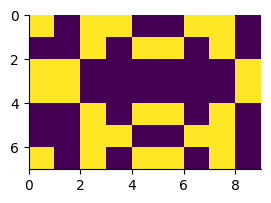

In [5]:
im = parse_para(test1[0])
fig, ax = plt.subplots(figsize=(3,2))
ax.pcolormesh(im)
ax.set(ylim=reversed(ax.get_ylim()));

In [6]:
def find_reflection_col(im, n_smudge=0):
    for i in range(1, im.shape[1]):
        left = im[:,:i]
        right = im[:,i:]

        minwidth = min(left.shape[1], right.shape[1])

        part_left = left[:,-minwidth:]
        part_right = right[:,:minwidth][:,::-1]
        
        mask = part_left == part_right
        if mask.size - mask.sum() == n_smudge:
            return i
    return None
        
def find_reflection(im, n_smudge=0):
    rcol = find_reflection_col(im, n_smudge=n_smudge)
    if rcol is not None:
        return rcol
    
    rrow = find_reflection_col(im.T, n_smudge=n_smudge)
    return 100 * rrow

In [7]:
sum(find_reflection(parse_para(para)) for para in test1)

405

In [8]:
sum(find_reflection(parse_para(para)) for para in inp)

35538

## Part 2

In [9]:
sum(find_reflection(parse_para(para), n_smudge=1) for para in test1)

400

In [10]:
sum(find_reflection(parse_para(para), n_smudge=1) for para in inp)

30442